# Task 3: Helper notebook for loading the data and saving the predictions

In [1]:
import pickle
import gzip

### Helper functions

In [2]:
def load_zipped_pickle(filename):
    with gzip.open(filename, 'rb') as f:
        loaded_object = pickle.load(f)
        return loaded_object

In [3]:
def save_zipped_pickle(obj, filename):
    with gzip.open(filename, 'wb') as f:
        pickle.dump(obj, f, 2)

### Load data, make predictions and save prediction in correct format

In [4]:
# load data
train_data = load_zipped_pickle("train.pkl")
test_data = load_zipped_pickle("test.pkl")
samples = load_zipped_pickle("sample.pkl")

In [5]:
from matplotlib import pyplot as plt
from IPython.display import clear_output
import time
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
# import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [6]:
IMG_SIZE = 64*10# max(max(set(d['box'].shape[0] for d in train_data)), max(set(d['box'].shape[1] for d in train_data))) //64*64 // 1

IMG_SIZE = (IMG_SIZE, IMG_SIZE)
print(IMG_SIZE)

directory = '/Users/rcasado/Desktop/Rodrigo_work/Universidad/PhD/Other/Coding/Visual Studio Code/AML/task3/images_big'
directory_only_expert = '/Users/rcasado/Desktop/Rodrigo_work/Universidad/PhD/Other/Coding/Visual Studio Code/AML/task3/images_only_expert'

(640, 640)


In [7]:
from keras.preprocessing.image import ImageDataGenerator

rotation_range = 15
width_shift_range = 0.15
height_shift_range = 0.15
shear_range = 0.15
zoom_range = 0.1
seed = 1
sigma = .5

batch_size = 32

def preprocessing_function(x):
    # x = elasticdeform.deform_random_grid(x, points=6, sigma=sigma, axis=(0, 1))
    x = (x / 255. - 0.5) * 2.
    return x

def preprocessing_function_label(x):
    x = (x/255.).astype(np.bool_).reshape(IMG_SIZE[0], IMG_SIZE[1], 1)
    return x

def obtain_datagenerator(directory, preprocessing_function, batch_size=batch_size, seed=seed, rotation_range=rotation_range, width_shift_range=width_shift_range, height_shift_range=height_shift_range, shear_range=shear_range, zoom_range=zoom_range, IMG_SIZE=IMG_SIZE):

    datagen = ImageDataGenerator(
        rotation_range=rotation_range,
        width_shift_range=width_shift_range,
        height_shift_range=height_shift_range,
        shear_range=shear_range,
        zoom_range=zoom_range,
        preprocessing_function=preprocessing_function,
    )

    generator = datagen.flow_from_directory(
        directory,
        target_size=IMG_SIZE,
        batch_size=batch_size,
        color_mode='grayscale',
        class_mode=None,
        seed = seed,
    )

    return generator

def obtain_test_datagenerator(directory, preprocessing_function, IMG_SIZE=IMG_SIZE):

    datagen = ImageDataGenerator(
        preprocessing_function=preprocessing_function,
    )

    generator = datagen.flow_from_directory(
        directory,
        target_size=IMG_SIZE,
        batch_size=batch_size,
        color_mode='grayscale',
        class_mode=None,
        seed = seed,
    )

    return generator


In [8]:
# TRAIN
# IMAGES
train_generator = obtain_datagenerator(directory + '/train/train', preprocessing_function)

# LABELS
train_mask_generator = obtain_datagenerator(directory + '/train/train_label', preprocessing_function_label)

# # BOXES
# train_box_generator = obtain_datagenerator(directory + '/train/train_box', preprocessing_function_label)

# VAL
# IMAGES
val_generator = obtain_datagenerator(directory + '/val/train', preprocessing_function)

# LABELS
val_mask_generator = obtain_datagenerator(directory + '/val/train_label', preprocessing_function_label)

# BOXES
val_box_generator = obtain_datagenerator(directory + '/val/train_box', preprocessing_function_label)

# TEST
# IMAGES
test_generator = obtain_test_datagenerator(directory + '/test/train', preprocessing_function)

# LABELS
test_mask_generator = obtain_test_datagenerator(directory + '/test/train_label', preprocessing_function_label)

# BOXES
test_box_generator = obtain_test_datagenerator(directory + '/test/train_box', preprocessing_function_label)

# TRAIN_ALL
# IMAGES
train_all_generator = obtain_datagenerator(directory + '/all/train', preprocessing_function)

# LABELS
train_all_mask_generator = obtain_datagenerator(directory + '/all/train_label', preprocessing_function_label)

# # BOXES
# train_all_box_generator = obtain_datagenerator(directory + '/all/train_box', preprocessing_function_label)

Found 48 images belonging to 1 classes.
Found 48 images belonging to 1 classes.
Found 9 images belonging to 1 classes.
Found 9 images belonging to 1 classes.
Found 9 images belonging to 1 classes.
Found 3685 images belonging to 1 classes.
Found 0 images belonging to 1 classes.
Found 0 images belonging to 1 classes.
Found 195 images belonging to 1 classes.
Found 195 images belonging to 1 classes.


In [9]:
def my_image_mask_generator(image_data_generator, mask_data_generator):
    for (img, mask) in zip(image_data_generator, mask_data_generator):
        yield (img, mask)

In [10]:
train_batches = my_image_mask_generator(train_generator, train_mask_generator)

val_batches = my_image_mask_generator(val_generator, val_mask_generator)

train_all_batches = my_image_mask_generator(train_all_generator, train_all_mask_generator)

In [11]:
# TRAIN_EXPERT
# IMAGES
train_only_expert_generator = obtain_datagenerator(directory_only_expert + '/train/train', preprocessing_function)

# LABELS
train_only_expert_mask_generator = obtain_datagenerator(directory_only_expert + '/train/train_label', preprocessing_function_label)

# # BOXES
# train_only_expert_box_generator = obtain_datagenerator(directory_only_expert + '/train/train_box', preprocessing_function_label)

# VAL_EXPERT
# IMAGES
val_only_expert_generator = obtain_datagenerator(directory_only_expert + '/val/train', preprocessing_function)

# LABELS
val_only_expert_mask_generator = obtain_datagenerator(directory_only_expert + '/val/train_label', preprocessing_function_label)

# BOXES
# val_only_expert_box_generator = obtain_datagenerator(directory_only_expert + '/val/train_box', preprocessing_function_label)

# TRAIN_ALL_EXPERT
# IMAGES
train_all_only_expert_generator = obtain_datagenerator(directory_only_expert + '/all/train', preprocessing_function)

# LABELS
train_all_only_expert_mask_generator = obtain_datagenerator(directory_only_expert + '/all/train_label', preprocessing_function_label)

# # BOXES
# train_all_only_expert_box_generator = obtain_datagenerator(directory_only_expert + '/all/train_box', preprocessing_function_label)

Found 48 images belonging to 1 classes.
Found 48 images belonging to 1 classes.
Found 9 images belonging to 1 classes.
Found 9 images belonging to 1 classes.
Found 57 images belonging to 1 classes.
Found 57 images belonging to 1 classes.


In [12]:
train_only_expert_batches = my_image_mask_generator(train_only_expert_generator, train_only_expert_mask_generator)

val_only_expert_batches = my_image_mask_generator(val_only_expert_generator, val_only_expert_mask_generator)

train_all_only_expert_batches = my_image_mask_generator(train_all_only_expert_generator, train_all_only_expert_mask_generator)

from IPython.display import clear_output
import time
a = next(train_batches)
for i in range(batch_size):
    plt.imshow(a[0][i] + 2*a[1][i], cmap='hot', vmin=-1, vmax=3)
    plt.show()
    clear_output(wait=True)
    time.sleep(.5)

# MODEL

In [13]:
dropout = .25

In [14]:
def double_conv_block(x, n_filters):

   x = layers.Conv2D(n_filters, 3, padding = "same", activation = "linear", kernel_initializer = "he_normal")(x)
   x = layers.BatchNormalization()(x)
   x = layers.Activation("relu")(x)
   x = layers.Conv2D(n_filters, 3, padding = "same", activation = "relu", kernel_initializer = "he_normal")(x)

   return x

In [15]:
def downsample_block(x, n_filters):
   
   f = double_conv_block(x, n_filters)
   p = layers.MaxPool2D(2, strides=2)(f)
   p = layers.BatchNormalization()(p)
   p = layers.Dropout(dropout)(p)

   return f, p

In [16]:
def upsample_block(x, conv_features, n_filters):
   
   x = layers.Conv2DTranspose(n_filters, 3, 2, padding="same", activation="linear")(x)
   x = layers.BatchNormalization()(x)
   x = layers.Activation("relu")(x)
   x = layers.concatenate([x, conv_features])
   x = layers.Dropout(dropout)(x)
   x = double_conv_block(x, n_filters)

   return x

In [17]:
def build_unet_model():
    
    inputs = layers.Input(shape=IMG_SIZE + (1,))

    # encoder: contracting path - downsample
    # 1 - downsample
    f1, p1 = downsample_block(inputs, 32)
    # 2 - downsample
    f2, p2 = downsample_block(p1, 64)
    # 3 - downsample
    f3, p3 = downsample_block(p2, 128)
    # 4 - downsample
    f4, p4 = downsample_block(p3, 256)
    # 5 - downsample
    f5, p5 = downsample_block(p4, 512)
    # 6 - downsample
    f6, p6 = downsample_block(p5, 512)

    # 7 - bottleneck
    bottleneck = double_conv_block(p6, 1024)

    # decoder: expanding path - upsample
    # 8 - upsample
    u8 = upsample_block(bottleneck, f6, 512)
    # 9 - upsample
    u9 = upsample_block(u8, f5, 512)
    # 10 - upsample
    u10 = upsample_block(u9, f4, 256)
    # 11 - upsample
    u11 = upsample_block(u10, f3, 128)
    # 12 - upsample
    u12 = upsample_block(u11, f2, 64)
    # 13 - upsample
    u13 = upsample_block(u12, f1, 32)

    # outputs
    outputs = layers.Conv2D(1, 1, padding="same", activation = "sigmoid")(u13)

    # unet model with Keras Functional API
    unet_model = tf.keras.Model(inputs, outputs, name="U-Net")

    return unet_model

unet_model = build_unet_model()

2023-12-22 15:14:16.536831: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Max
2023-12-22 15:14:16.536855: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 64.00 GB
2023-12-22 15:14:16.536858: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 24.00 GB
2023-12-22 15:14:16.536895: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-12-22 15:14:16.536910: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


def build_unet_model():
    
    inputs = layers.Input(shape=IMG_SIZE + (1,))

    # encoder: contracting path - downsample
    # 1 - downsample
    f1, p1 = downsample_block(inputs, 32)
    # 2 - downsample
    f2, p2 = downsample_block(p1, 64)
    # 3 - downsample
    f3, p3 = downsample_block(p2, 128)
    # 4 - downsample
    f4, p4 = downsample_block(p3, 256)
    # 4 - downsample
    f5, p5 = downsample_block(p4, 512)

    # 5 - bottleneck
    bottleneck = double_conv_block(p5, 1024)

    # decoder: expanding path - upsample
    # 6 - upsample
    u6 = upsample_block(bottleneck, f5, 512)
    # 7 - upsample
    u7 = upsample_block(u6, f4, 256)
    # 8 - upsample
    u8 = upsample_block(u7, f3, 128)
    # 9 - upsample
    u9 = upsample_block(u8, f2, 64)
    # 10 - upsample
    u10 = upsample_block(u9, f1, 32)

    # outputs
    outputs = layers.Conv2D(1, 1, padding="same", activation = "sigmoid")(u10)

    # unet model with Keras Functional API
    unet_model = tf.keras.Model(inputs, outputs, name="U-Net")

    return unet_model

unet_model = build_unet_model()

dropout = .65

def build_unet_model():
    
    inputs = layers.Input(shape=IMG_SIZE + (1,))

    # encoder: contracting path - downsample
    # 1 - downsample
    f1, p1 = downsample_block(inputs, 128)
    # 2 - downsample
    f2, p2 = downsample_block(p1, 512)
    # 3 - downsample
    f3, p3 = downsample_block(p2, 1024)

    # 5 - bottleneck
    bottleneck = double_conv_block(p3, 2048)

    # decoder: expanding path - upsample
    # 6 - upsample
    u6 = upsample_block(bottleneck, f3, 1024)
    # 7 - upsample
    u7 = upsample_block(u6, f2, 512)
    # 8 - upsample
    u8 = upsample_block(u7, f1, 128)

    # outputs
    outputs = layers.Conv2D(1, 1, padding="same", activation = "sigmoid")(u8)

    # unet model with Keras Functional API
    unet_model = tf.keras.Model(inputs, outputs, name="U-Net")

    return unet_model

unet_model = build_unet_model()

In [18]:
print(unet_model.summary())

Model: "U-Net"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 640, 640, 1)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 640, 640, 32)         320       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 640, 640, 32)         128       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 640, 640, 32)         0         ['batch_normalization[0][0

In [19]:
# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) backend random seed
# 3) `python` random seed
keras.utils.set_random_seed(seed)

In [20]:
def scheduler(epoch, lr):
    if epoch % 30 == 0 and epoch != 0:
        return lr / 10
    else:
        return lr

callback = keras.callbacks.LearningRateScheduler(scheduler)

In [21]:
IMG_SIZE

(640, 640)

In [22]:
unet_model.compile(optimizer=tf.keras.optimizers.legacy.Adam(),
                  loss="binary_crossentropy",
                  metrics=["accuracy"])#, keras.metrics.MeanIoU(num_classes=2)])

NUM_EPOCHS = 50

STEPS_PER_EPOCH = (165 // batch_size) * 5
VALIDATION_STEPS = (39 // batch_size) + 1

model_history = unet_model.fit(train_all_batches,
                              epochs=NUM_EPOCHS,
                              steps_per_epoch=STEPS_PER_EPOCH,
                              validation_steps=VALIDATION_STEPS,
                              callbacks=[callback],
                              validation_data=val_batches)

Epoch 1/50


2023-12-22 15:14:19.165548: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 115s 4s/step - loss: 0.1553 - accuracy: 0.9380 - val_loss: 0.0615 - val_accuracy: 0.9917 - lr: 0.0010
Epoch 2/50
25/25 [==============================] - 108s 4s/step - loss: 0.0262 - accuracy: 0.9901 - val_loss: 0.3046 - val_accuracy: 0.9918 - lr: 0.0010
Epoch 3/50
25/25 [==============================] - 107s 4s/step - loss: 0.0201 - accuracy: 0.9916 - val_loss: 0.0799 - val_accuracy: 0.9914 - lr: 0.0010
Epoch 4/50
25/25 [==============================] - 104s 4s/step - loss: 0.0190 - accuracy: 0.9931 - val_loss: 0.0569 - val_accuracy: 0.9885 - lr: 0.0010
Epoch 5/50
25/25 [==============================] - 108s 4s/step - loss: 0.0158 - accuracy: 0.9941 - val_loss: 0.0489 - val_accuracy: 0.9916 - lr: 0.0010
Epoch 6/50
25/25 [==============================] - 103s 4s/step - loss: 0.0153 - accuracy: 0.9942 - val_loss: 0.0473 - val_accuracy: 0.9925 - lr: 0.0010
Epoch 7/50
25/25 [==============================] - 103s 4s/step - loss: 0.0134 - accur

Error: command buffer exited with error status.
	The Metal Performance Shaders operations encoded on it may not have completed.
	Error: 
	(null)
	Internal Error (0000000e:Internal Error)
	<AGXG14XFamilyCommandBuffer: 0x312b28da0>
    label = <none> 
    device = <AGXG14CDevice: 0x39bf6b000>
        name = Apple M2 Max 
    commandQueue = <AGXG14XFamilyCommandQueue: 0x149050200>
        label = <none> 
        device = <AGXG14CDevice: 0x39bf6b000>
            name = Apple M2 Max 
    retainedReferences = 1


25/25 [==============================] - 104s 4s/step - loss: 0.0105 - accuracy: 0.9957 - val_loss: 0.0193 - val_accuracy: 0.9943 - lr: 0.0010
Epoch 14/50
25/25 [==============================] - 104s 4s/step - loss: 0.0103 - accuracy: 0.9957 - val_loss: 0.0739 - val_accuracy: 0.9882 - lr: 0.0010
Epoch 15/50
25/25 [==============================] - 108s 4s/step - loss: 0.0145 - accuracy: 0.9950 - val_loss: 0.0169 - val_accuracy: 0.9946 - lr: 0.0010
Epoch 16/50
 5/25 [=====>........................] - ETA: 1:12 - loss: 0.0107 - accuracy: 0.9956

Error: command buffer exited with error status.
	The Metal Performance Shaders operations encoded on it may not have completed.
	Error: 
	(null)
	Internal Error (0000000e:Internal Error)
	<AGXG14XFamilyCommandBuffer: 0x54c1ec460>
    label = <none> 
    device = <AGXG14CDevice: 0x39bf6b000>
        name = Apple M2 Max 
    commandQueue = <AGXG14XFamilyCommandQueue: 0x149050200>
        label = <none> 
        device = <AGXG14CDevice: 0x39bf6b000>
            name = Apple M2 Max 
    retainedReferences = 1


25/25 [==============================] - 104s 4s/step - loss: 0.0107 - accuracy: 0.9956 - val_loss: 0.0116 - val_accuracy: 0.9957 - lr: 0.0010
Epoch 17/50
25/25 [==============================] - 108s 4s/step - loss: 0.0099 - accuracy: 0.9959 - val_loss: 0.0121 - val_accuracy: 0.9949 - lr: 0.0010
Epoch 18/50
25/25 [==============================] - 105s 4s/step - loss: 0.0096 - accuracy: 0.9960 - val_loss: 0.0105 - val_accuracy: 0.9959 - lr: 0.0010
Epoch 19/50
25/25 [==============================] - 108s 4s/step - loss: 0.0093 - accuracy: 0.9961 - val_loss: 0.0109 - val_accuracy: 0.9954 - lr: 0.0010
Epoch 20/50
25/25 [==============================] - 104s 4s/step - loss: 0.0094 - accuracy: 0.9960 - val_loss: 0.0132 - val_accuracy: 0.9945 - lr: 0.0010
Epoch 21/50
25/25 [==============================] - 104s 4s/step - loss: 0.0094 - accuracy: 0.9961 - val_loss: 0.0833 - val_accuracy: 0.9844 - lr: 0.0010
Epoch 22/50
25/25 [==============================] - 108s 4s/step - loss: 0.0140 -

Error: command buffer exited with error status.
	The Metal Performance Shaders operations encoded on it may not have completed.
	Error: 
	(null)
	Internal Error (0000000e:Internal Error)
	<AGXG14XFamilyCommandBuffer: 0x412e29510>
    label = <none> 
    device = <AGXG14CDevice: 0x39bf6b000>
        name = Apple M2 Max 
    commandQueue = <AGXG14XFamilyCommandQueue: 0x149050200>
        label = <none> 
        device = <AGXG14CDevice: 0x39bf6b000>
            name = Apple M2 Max 
    retainedReferences = 1


25/25 [==============================] - 108s 4s/step - loss: 0.0085 - accuracy: 0.9964 - val_loss: 0.0077 - val_accuracy: 0.9967 - lr: 0.0010
Epoch 25/50
13/25 [==============>...............] - ETA: 49s - loss: 0.0084 - accuracy: 0.9964

Error: command buffer exited with error status.
	The Metal Performance Shaders operations encoded on it may not have completed.
	Error: 
	(null)
	Internal Error (0000000e:Internal Error)
	<AGXG14XFamilyCommandBuffer: 0x312abe8f0>
    label = <none> 
    device = <AGXG14CDevice: 0x39bf6b000>
        name = Apple M2 Max 
    commandQueue = <AGXG14XFamilyCommandQueue: 0x149050200>
        label = <none> 
        device = <AGXG14CDevice: 0x39bf6b000>
            name = Apple M2 Max 
    retainedReferences = 1


25/25 [==============================] - 105s 4s/step - loss: 0.0086 - accuracy: 0.9964 - val_loss: 0.0147 - val_accuracy: 0.9938 - lr: 0.0010
Epoch 26/50
25/25 [==============================] - 108s 4s/step - loss: 0.0087 - accuracy: 0.9963 - val_loss: 0.0116 - val_accuracy: 0.9950 - lr: 0.0010
Epoch 27/50
25/25 [==============================] - 106s 4s/step - loss: 0.0092 - accuracy: 0.9961 - val_loss: 0.0102 - val_accuracy: 0.9956 - lr: 0.0010
Epoch 28/50
25/25 [==============================] - 105s 4s/step - loss: 0.0085 - accuracy: 0.9964 - val_loss: 0.0947 - val_accuracy: 0.9850 - lr: 0.0010
Epoch 29/50
25/25 [==============================] - 109s 4s/step - loss: 0.0148 - accuracy: 0.9951 - val_loss: 0.0129 - val_accuracy: 0.9953 - lr: 0.0010
Epoch 30/50
25/25 [==============================] - 105s 4s/step - loss: 0.0095 - accuracy: 0.9960 - val_loss: 0.0129 - val_accuracy: 0.9946 - lr: 0.0010
Epoch 31/50
25/25 [==============================] - 110s 4s/step - loss: 0.0085 -

In [23]:
unet_model.compile(optimizer=tf.keras.optimizers.legacy.Adam(1e-4),
                  loss="binary_crossentropy",
                  metrics=["accuracy"])#, keras.metrics.MeanIoU(num_classes=2)])

NUM_EPOCHS = 50

STEPS_PER_EPOCH = (165 // batch_size) * 2

model_history2 = unet_model.fit(train_only_expert_batches,
                              epochs=NUM_EPOCHS,
                              steps_per_epoch=STEPS_PER_EPOCH,
                              validation_steps=VALIDATION_STEPS,
                              callbacks=[callback],
                              validation_data=val_only_expert_batches)

Epoch 1/50
10/10 [==============================] - 38s 4s/step - loss: 0.0062 - accuracy: 0.9974 - val_loss: 0.0068 - val_accuracy: 0.9972 - lr: 1.0000e-04
Epoch 2/50
10/10 [==============================] - 35s 3s/step - loss: 0.0057 - accuracy: 0.9976 - val_loss: 0.0067 - val_accuracy: 0.9972 - lr: 1.0000e-04
Epoch 3/50
10/10 [==============================] - 35s 3s/step - loss: 0.0056 - accuracy: 0.9976 - val_loss: 0.0070 - val_accuracy: 0.9970 - lr: 1.0000e-04
Epoch 4/50
10/10 [==============================] - 35s 3s/step - loss: 0.0054 - accuracy: 0.9977 - val_loss: 0.0067 - val_accuracy: 0.9972 - lr: 1.0000e-04
Epoch 5/50
10/10 [==============================] - 35s 3s/step - loss: 0.0054 - accuracy: 0.9977 - val_loss: 0.0069 - val_accuracy: 0.9970 - lr: 1.0000e-04
Epoch 6/50
10/10 [==============================] - 35s 3s/step - loss: 0.0053 - accuracy: 0.9977 - val_loss: 0.0070 - val_accuracy: 0.9969 - lr: 1.0000e-04
Epoch 7/50
10/10 [==============================] - 35s 3s

Error: command buffer exited with error status.
	The Metal Performance Shaders operations encoded on it may not have completed.
	Error: 
	(null)
	Internal Error (0000000e:Internal Error)
	<AGXG14XFamilyCommandBuffer: 0x343873ab0>
    label = <none> 
    device = <AGXG14CDevice: 0x39bf6b000>
        name = Apple M2 Max 
    commandQueue = <AGXG14XFamilyCommandQueue: 0x149050200>
        label = <none> 
        device = <AGXG14CDevice: 0x39bf6b000>
            name = Apple M2 Max 
    retainedReferences = 1


10/10 [==============================] - 35s 3s/step - loss: 0.0042 - accuracy: 0.9982 - val_loss: 0.0080 - val_accuracy: 0.9966 - lr: 1.0000e-05
Epoch 32/50
10/10 [==============================] - 34s 3s/step - loss: 0.0041 - accuracy: 0.9982 - val_loss: 0.0084 - val_accuracy: 0.9965 - lr: 1.0000e-05
Epoch 33/50
10/10 [==============================] - 36s 3s/step - loss: 0.0041 - accuracy: 0.9982 - val_loss: 0.0085 - val_accuracy: 0.9964 - lr: 1.0000e-05
Epoch 34/50
10/10 [==============================] - 35s 3s/step - loss: 0.0041 - accuracy: 0.9982 - val_loss: 0.0086 - val_accuracy: 0.9965 - lr: 1.0000e-05
Epoch 35/50
10/10 [==============================] - 35s 3s/step - loss: 0.0041 - accuracy: 0.9982 - val_loss: 0.0079 - val_accuracy: 0.9967 - lr: 1.0000e-05
Epoch 36/50
10/10 [==============================] - 35s 3s/step - loss: 0.0041 - accuracy: 0.9982 - val_loss: 0.0080 - val_accuracy: 0.9967 - lr: 1.0000e-05
Epoch 37/50
10/10 [==============================] - 34s 3s/step

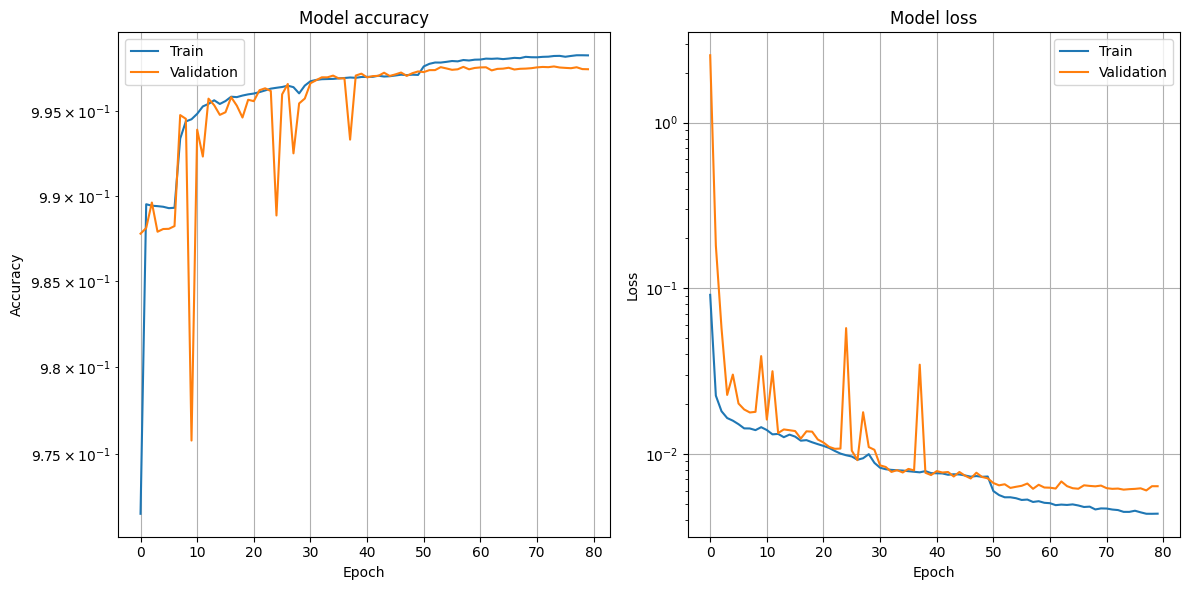

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(model_history.history['accuracy']+model_history2.history['accuracy'])
plt.plot(model_history.history['val_accuracy']+model_history2.history['val_accuracy'])
plt.yscale('log')
plt.grid()
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(model_history.history['loss']+model_history2.history['loss'])
plt.plot(model_history.history['val_loss']+model_history2.history['val_loss'])
plt.yscale('log')
plt.grid()
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()

In [ ]:
unet_model.compile(optimizer=tf.keras.optimizers.legacy.Adam(1e-4),
                  loss="binary_crossentropy",
                  metrics=["accuracy"])#, keras.metrics.MeanIoU(num_classes=2)])

NUM_EPOCHS = 20

STEPS_PER_EPOCH = (165 // batch_size) * 2
VALIDATION_STEPS = (39 // batch_size) + 1

model_history = unet_model.fit(train_only_expert_batches,
                              epochs=NUM_EPOCHS,
                              steps_per_epoch=STEPS_PER_EPOCH,
                              validation_steps=VALIDATION_STEPS,
                              validation_data=val_only_expert_batches)

Epoch 1/20
20/20 [==============================] - 15s 681ms/step - loss: 0.0076 - accuracy: 0.9975 - val_loss: 0.0159 - val_accuracy: 0.9954
Epoch 2/20
20/20 [==============================] - 13s 666ms/step - loss: 0.0074 - accuracy: 0.9976 - val_loss: 0.0235 - val_accuracy: 0.9946
Epoch 3/20
20/20 [==============================] - 13s 665ms/step - loss: 0.0072 - accuracy: 0.9977 - val_loss: 0.0234 - val_accuracy: 0.9943
Epoch 4/20
20/20 [==============================] - 13s 672ms/step - loss: 0.0071 - accuracy: 0.9978 - val_loss: 0.0204 - val_accuracy: 0.9948
Epoch 5/20
20/20 [==============================] - 13s 673ms/step - loss: 0.0070 - accuracy: 0.9978 - val_loss: 0.0207 - val_accuracy: 0.9948
Epoch 6/20
20/20 [==============================] - 13s 674ms/step - loss: 0.0071 - accuracy: 0.9978 - val_loss: 0.0245 - val_accuracy: 0.9943
Epoch 7/20
20/20 [==============================] - 13s 673ms/step - loss: 0.0070 - accuracy: 0.9978 - val_loss: 0.0208 - val_accuracy: 0.9952

In [ ]:
NUM_EPOCHS = 70

STEPS_PER_EPOCH = (165 // batch_size) * 5
VALIDATION_STEPS = 1

model_history = unet_model.fit(train_batches,
                              epochs=NUM_EPOCHS,
                              steps_per_epoch=STEPS_PER_EPOCH,
                              validation_steps=VALIDATION_STEPS,
                              callbacks=[callback],
                              validation_data=val_batches)


unet_model.compile(optimizer=tf.keras.optimizers.legacy.Adam(1e-4),
                  loss="binary_crossentropy",
                  metrics=["accuracy"])#, keras.metrics.MeanIoU(num_classes=2)])

NUM_EPOCHS = 30

STEPS_PER_EPOCH = (165 // batch_size) * 2

model_history = unet_model.fit(train_only_expert_batches,
                              epochs=NUM_EPOCHS,
                              steps_per_epoch=STEPS_PER_EPOCH,
                              validation_steps=VALIDATION_STEPS,
                              callbacks=[callback],
                              validation_data=val_only_expert_batches)

Epoch 1/50
20/20 [==============================] - 15s 685ms/step - loss: 0.0061 - accuracy: 0.9981 - val_loss: 0.0230 - val_accuracy: 0.9946 - lr: 1.0000e-04
Epoch 2/50
20/20 [==============================] - 13s 671ms/step - loss: 0.0060 - accuracy: 0.9982 - val_loss: 0.0202 - val_accuracy: 0.9947 - lr: 1.0000e-04
Epoch 3/50
20/20 [==============================] - 13s 671ms/step - loss: 0.0059 - accuracy: 0.9982 - val_loss: 0.0245 - val_accuracy: 0.9944 - lr: 1.0000e-04
Epoch 4/50
20/20 [==============================] - 13s 672ms/step - loss: 0.0059 - accuracy: 0.9982 - val_loss: 0.0231 - val_accuracy: 0.9945 - lr: 1.0000e-04
Epoch 5/50
20/20 [==============================] - 14s 677ms/step - loss: 0.0059 - accuracy: 0.9982 - val_loss: 0.0204 - val_accuracy: 0.9948 - lr: 1.0000e-04
Epoch 6/50
20/20 [==============================] - 13s 674ms/step - loss: 0.0058 - accuracy: 0.9982 - val_loss: 0.0215 - val_accuracy: 0.9946 - lr: 1.0000e-04
Epoch 7/50
20/20 [======================

KeyboardInterrupt: 

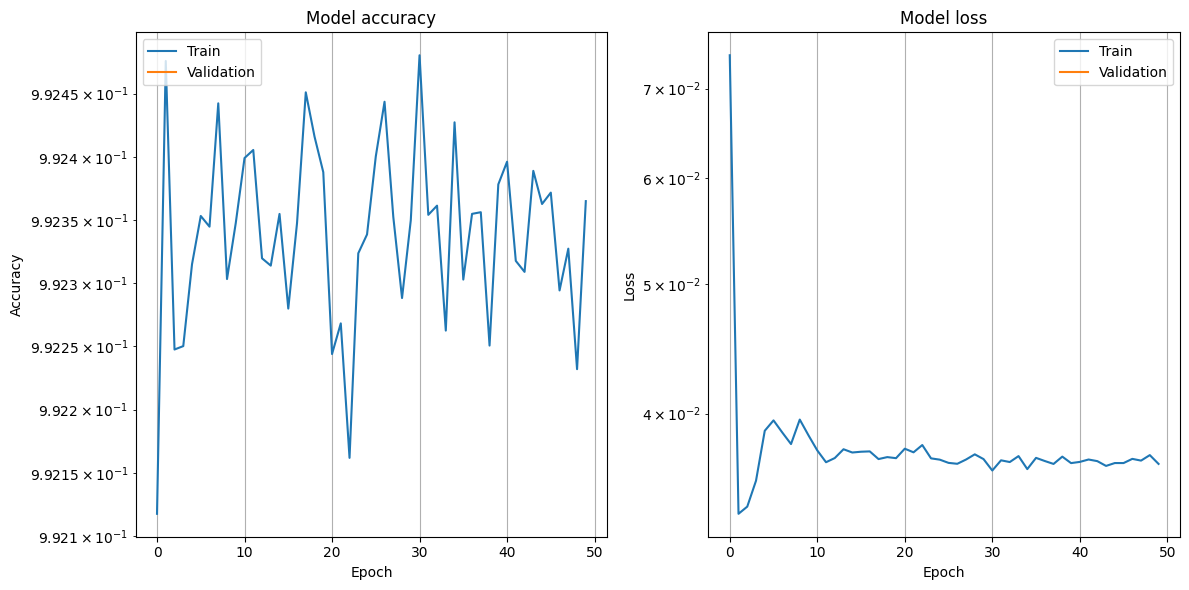

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.yscale('log')
plt.grid()
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.yscale('log')
plt.grid()
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()

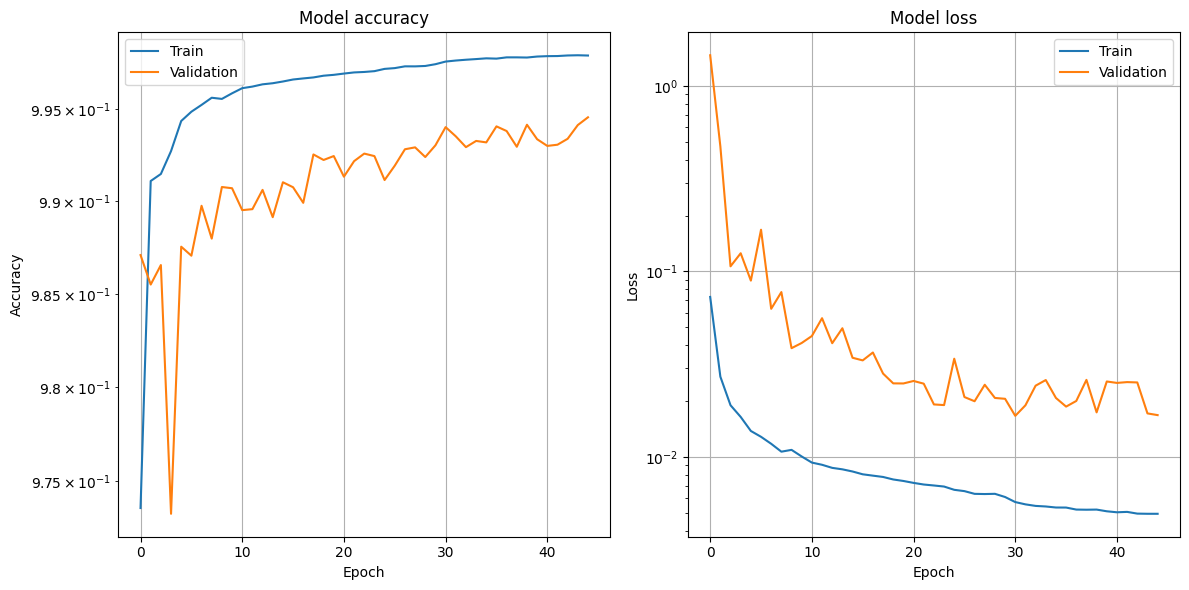

In [ ]:
# big one, with all data

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.yscale('log')
plt.grid()
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.yscale('log')
plt.grid()
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()

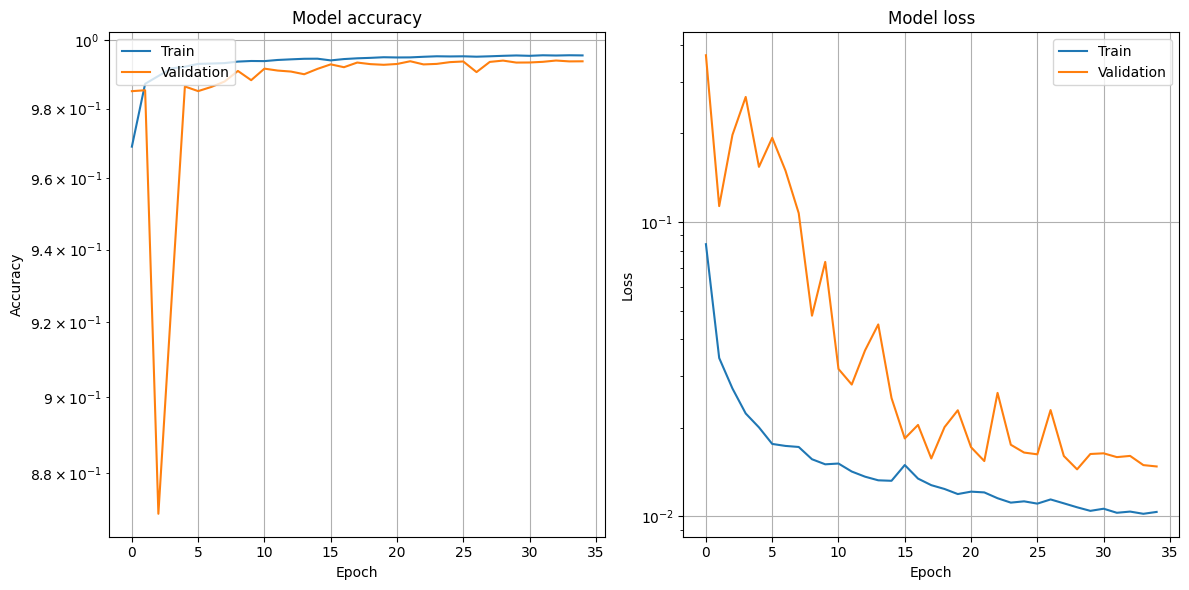

In [ ]:
# big one, with only train, not all

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.yscale('log')
plt.grid()
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.yscale('log')
plt.grid()
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()

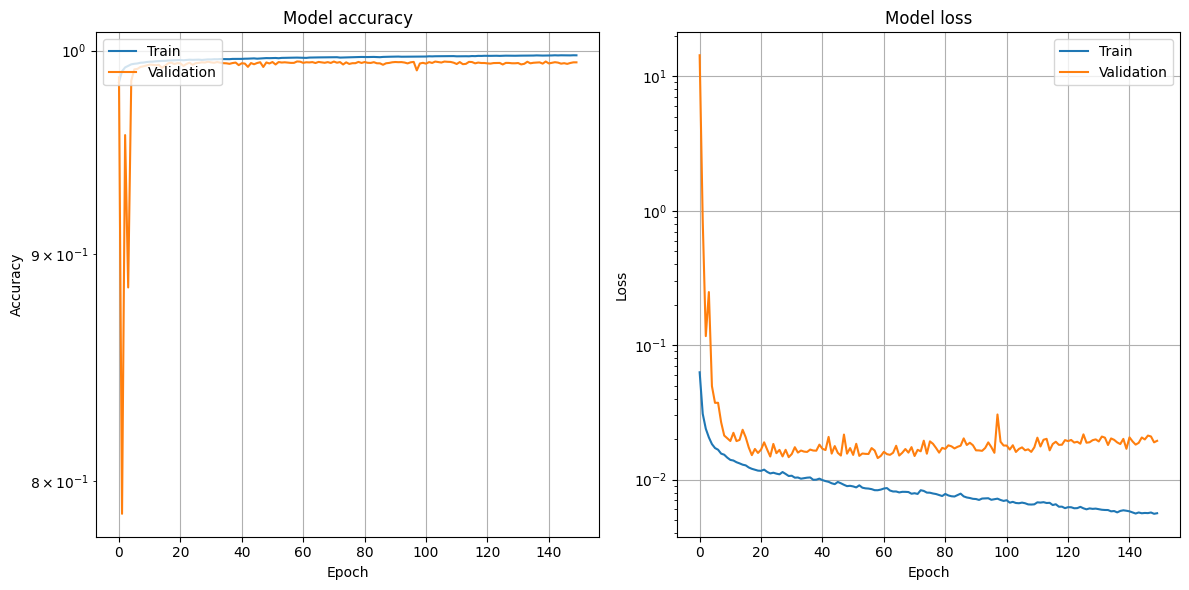

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.yscale('log')
plt.grid()
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.yscale('log')
plt.grid()
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()

In [ ]:
def build_unet_model():
    
    inputs = layers.Input(shape=IMG_SIZE + (1,))

    # encoder: contracting path - downsample
    # 1 - downsample
    f1, p1 = downsample_block(inputs, 64)
    # 2 - downsample
    f2, p2 = downsample_block(p1, 128)
    # 3 - downsample
    f3, p3 = downsample_block(p2, 256)

    # 5 - bottleneck
    bottleneck = double_conv_block(p3, 512)

    # decoder: expanding path - upsample
    # 6 - upsample
    u6 = upsample_block(bottleneck, f3, 256)
    # 7 - upsample
    u7 = upsample_block(u6, f2, 128)
    # 8 - upsample
    u8 = upsample_block(u7, f1, 64)

    # outputs
    outputs = layers.Conv2D(1, 1, padding="same", activation = "sigmoid")(u8)

    # unet model with Keras Functional API
    unet_model = tf.keras.Model(inputs, outputs, name="U-Net")

    return unet_model

unet_model = build_unet_model()

In [ ]:
NUM_EPOCHS = 150

STEPS_PER_EPOCH = (165 // batch_size) * 5
VALIDATION_STEPS = 1

model_history = unet_model.fit(train_batches,
                              epochs=NUM_EPOCHS,
                              steps_per_epoch=STEPS_PER_EPOCH,
                              validation_steps=VALIDATION_STEPS,
                            #   callbacks=[callback],
                              validation_data=val_batches)

Epoch 1/150


2023-12-15 09:12:26.902521: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 11s 256ms/step - loss: 0.1185 - accuracy: 0.9545 - val_loss: 0.6844 - val_accuracy: 0.9849
Epoch 2/150
25/25 [==============================] - 5s 186ms/step - loss: 0.0300 - accuracy: 0.9875 - val_loss: 0.1354 - val_accuracy: 0.9854
Epoch 3/150
25/25 [==============================] - 5s 185ms/step - loss: 0.0214 - accuracy: 0.9913 - val_loss: 0.1317 - val_accuracy: 0.9252
Epoch 4/150
25/25 [==============================] - 5s 190ms/step - loss: 0.0184 - accuracy: 0.9927 - val_loss: 0.1296 - val_accuracy: 0.9301
Epoch 5/150
25/25 [==============================] - 5s 187ms/step - loss: 0.0163 - accuracy: 0.9935 - val_loss: 0.0518 - val_accuracy: 0.9743
Epoch 6/150
25/25 [==============================] - 5s 185ms/step - loss: 0.0149 - accuracy: 0.9940 - val_loss: 0.0230 - val_accuracy: 0.9908
Epoch 7/150
25/25 [==============================] - 5s 191ms/step - loss: 0.0143 - accuracy: 0.9942 - val_loss: 0.0233 - val_accuracy: 0.9919
Epoch 8/15

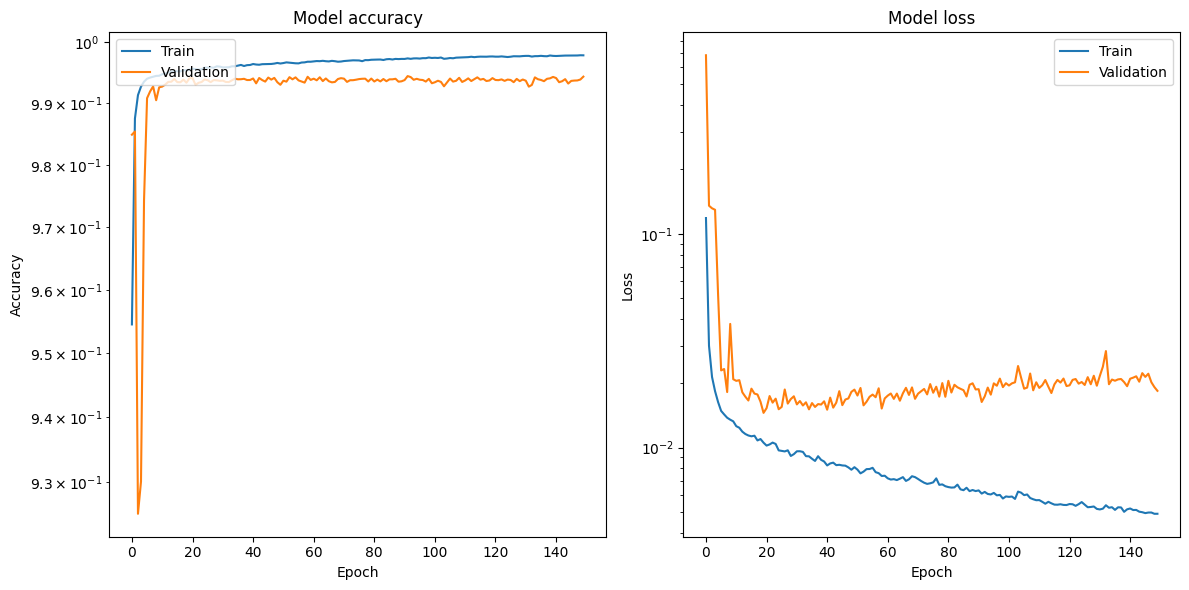

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.yscale('log')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.yscale('log')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()

In [ ]:
NUM_EPOCHS = 50

STEPS_PER_EPOCH = (165 // batch_size) * 5
VALIDATION_STEPS = 1

model_history = unet_model.fit(train_batches,
                              epochs=NUM_EPOCHS,
                              steps_per_epoch=STEPS_PER_EPOCH,
                              validation_steps=VALIDATION_STEPS,
                              callbacks=[callback],
                              validation_data=val_batches)

Epoch 1/50
15/15 [==============================] - 22s 1s/step - loss: 0.1059 - accuracy: 0.9616 - val_loss: 1587.7875 - val_accuracy: 0.9850 - lr: 0.0010
Epoch 2/50
15/15 [==============================] - 19s 1s/step - loss: 0.0367 - accuracy: 0.9871 - val_loss: 22.1768 - val_accuracy: 0.9858 - lr: 0.0010
Epoch 3/50
15/15 [==============================] - 19s 1s/step - loss: 0.0246 - accuracy: 0.9872 - val_loss: 1.1179 - val_accuracy: 0.9855 - lr: 0.0010
Epoch 4/50
15/15 [==============================] - 18s 1s/step - loss: 0.0220 - accuracy: 0.9876 - val_loss: 0.1477 - val_accuracy: 0.9838 - lr: 0.0010
Epoch 5/50
15/15 [==============================] - 19s 1s/step - loss: 0.0202 - accuracy: 0.9902 - val_loss: 0.0979 - val_accuracy: 0.9729 - lr: 0.0010
Epoch 6/50
15/15 [==============================] - 18s 1s/step - loss: 0.0173 - accuracy: 0.9931 - val_loss: 0.1023 - val_accuracy: 0.9544 - lr: 0.0010
Epoch 7/50
15/15 [==============================] - 18s 1s/step - loss: 0.0154

In [ ]:
def build_unet_model():
    
    inputs = layers.Input(shape=IMG_SIZE + (1,))

    # encoder: contracting path - downsample
    # 1 - downsample
    f1, p1 = downsample_block(inputs, 64)
    # 2 - downsample
    f2, p2 = downsample_block(p1, 128)

    # 5 - bottleneck
    bottleneck = double_conv_block(p2, 512)

    # decoder: expanding path - upsample
    # 6 - upsample
    u6 = upsample_block(bottleneck, f2, 256)
    # 8 - upsample
    u8 = upsample_block(u6, f1, 64)

    # outputs
    outputs = layers.Conv2D(1, 1, padding="same", activation = "sigmoid")(u8)

    # unet model with Keras Functional API
    unet_model = tf.keras.Model(inputs, outputs, name="U-Net")

    return unet_model

unet_model = build_unet_model()

In [ ]:
print(unet_model.summary())

Model: "U-Net"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 416, 416, 1)]        0         []                            
                                                                                                  
 conv2d_92 (Conv2D)          (None, 416, 416, 64)         640       ['input_5[0][0]']             
                                                                                                  
 batch_normalization_84 (Ba  (None, 416, 416, 64)         256       ['conv2d_92[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_64 (Activation)  (None, 416, 416, 64)         0         ['batch_normalization_84[0

In [ ]:
unet_model.compile(optimizer=tf.keras.optimizers.legacy.Adam(),
                  loss="binary_crossentropy",
                  metrics=["accuracy"])#, keras.metrics.MeanIoU(num_classes=2)])

In [ ]:
NUM_EPOCHS = 150

STEPS_PER_EPOCH = (165 // batch_size) * 5
VALIDATION_STEPS = 1

model_history = unet_model.fit(train_batches,
                              epochs=NUM_EPOCHS,
                              steps_per_epoch=STEPS_PER_EPOCH,
                              validation_steps=VALIDATION_STEPS,
                            #   callbacks=[callback],
                              validation_data=val_batches)

Epoch 1/150
25/25 [==============================] - 7s 265ms/step - loss: 0.0919 - accuracy: 0.9669 - val_loss: 0.4807 - val_accuracy: 0.9862
Epoch 2/150
25/25 [==============================] - 6s 251ms/step - loss: 0.0316 - accuracy: 0.9873 - val_loss: 0.1606 - val_accuracy: 0.9852
Epoch 3/150
25/25 [==============================] - 6s 251ms/step - loss: 0.0234 - accuracy: 0.9907 - val_loss: 0.1304 - val_accuracy: 0.9858
Epoch 4/150
25/25 [==============================] - 6s 251ms/step - loss: 0.0205 - accuracy: 0.9923 - val_loss: 0.0701 - val_accuracy: 0.9859
Epoch 5/150
25/25 [==============================] - 6s 252ms/step - loss: 0.0185 - accuracy: 0.9928 - val_loss: 0.0859 - val_accuracy: 0.9857
Epoch 6/150
25/25 [==============================] - 6s 250ms/step - loss: 0.0164 - accuracy: 0.9935 - val_loss: 0.0663 - val_accuracy: 0.9870
Epoch 7/150
25/25 [==============================] - 6s 249ms/step - loss: 0.0152 - accuracy: 0.9939 - val_loss: 0.0463 - val_accuracy: 0.9889

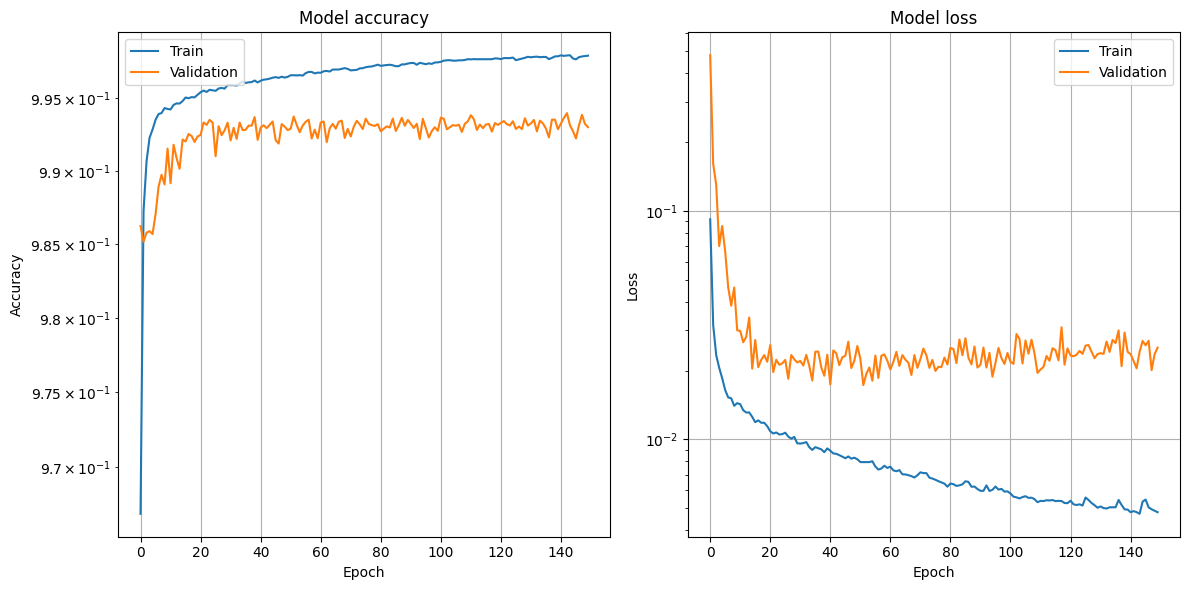

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.yscale('log')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.yscale('log')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()

In [ ]:
a = next(train_batches)

a[0].shape, a[1].shape

((9, 832, 832, 1), (16, 832, 832, 1))

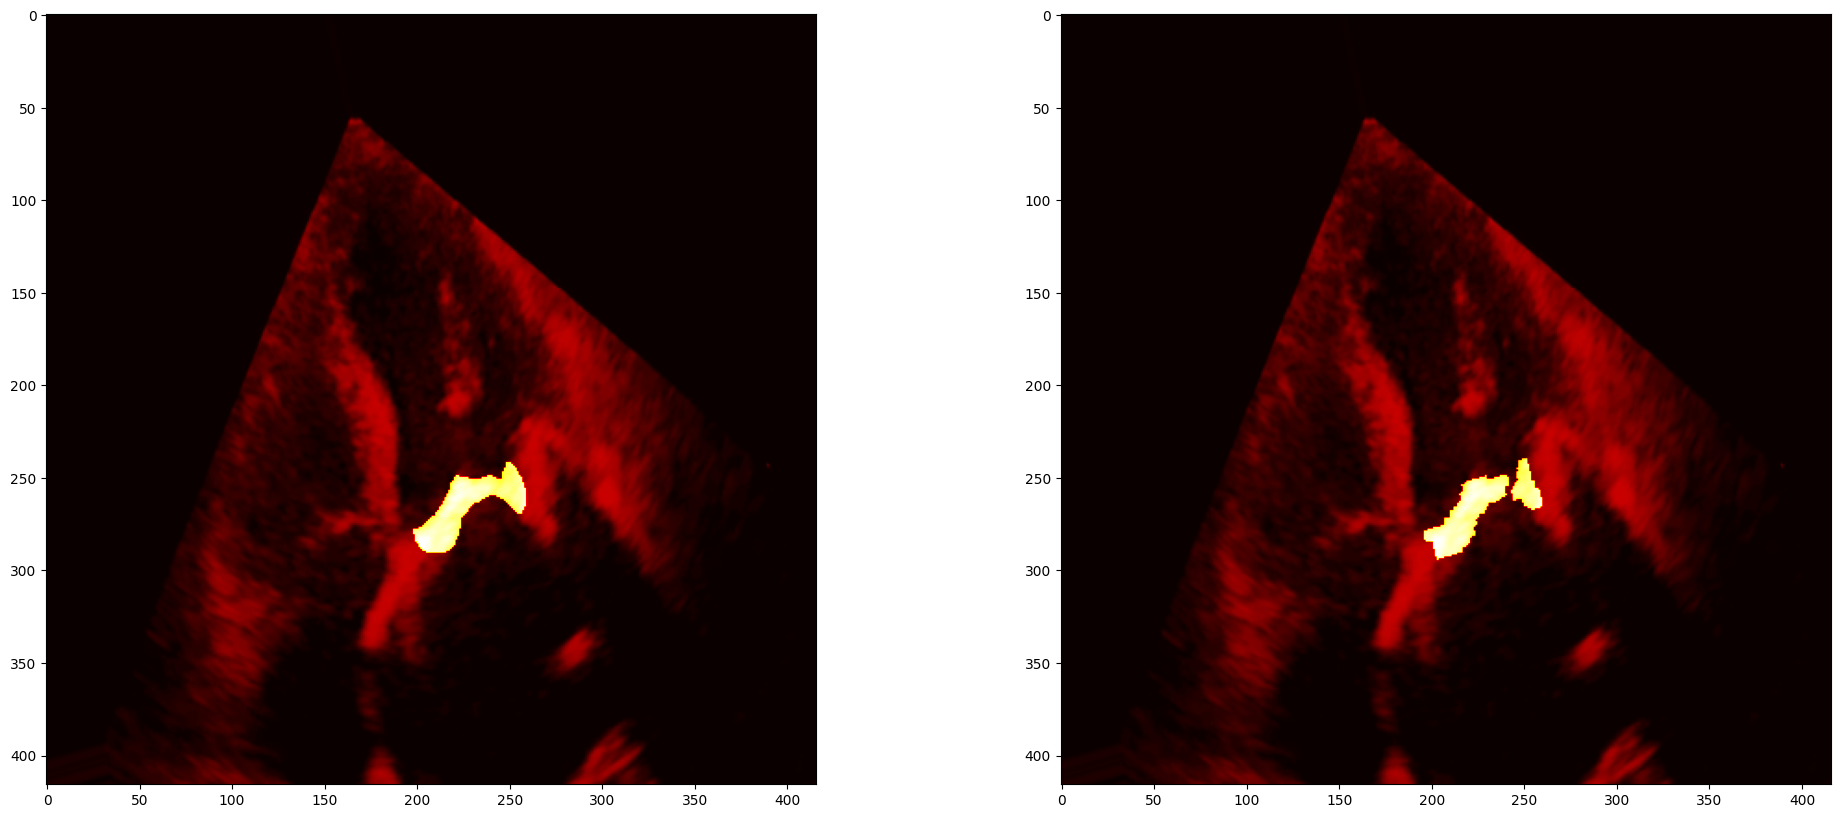

In [ ]:
a = next(train_batches)
b = np.where(unet_model.predict(a[0])>0.5, 1, 0)

for i in range(batch_size):
    plt.figure(figsize=(24, 10))
    plt.subplot(1, 2, 1)
    plt.imshow(a[0][i] + 5*b[i], cmap='hot', vmin=-1, vmax=6)
    plt.subplot(1, 2, 2)
    plt.imshow(a[0][i] + 5*a[1][i], cmap='hot', vmin=-1, vmax=6)
    plt.show()
    clear_output(wait=True)
    time.sleep(1)

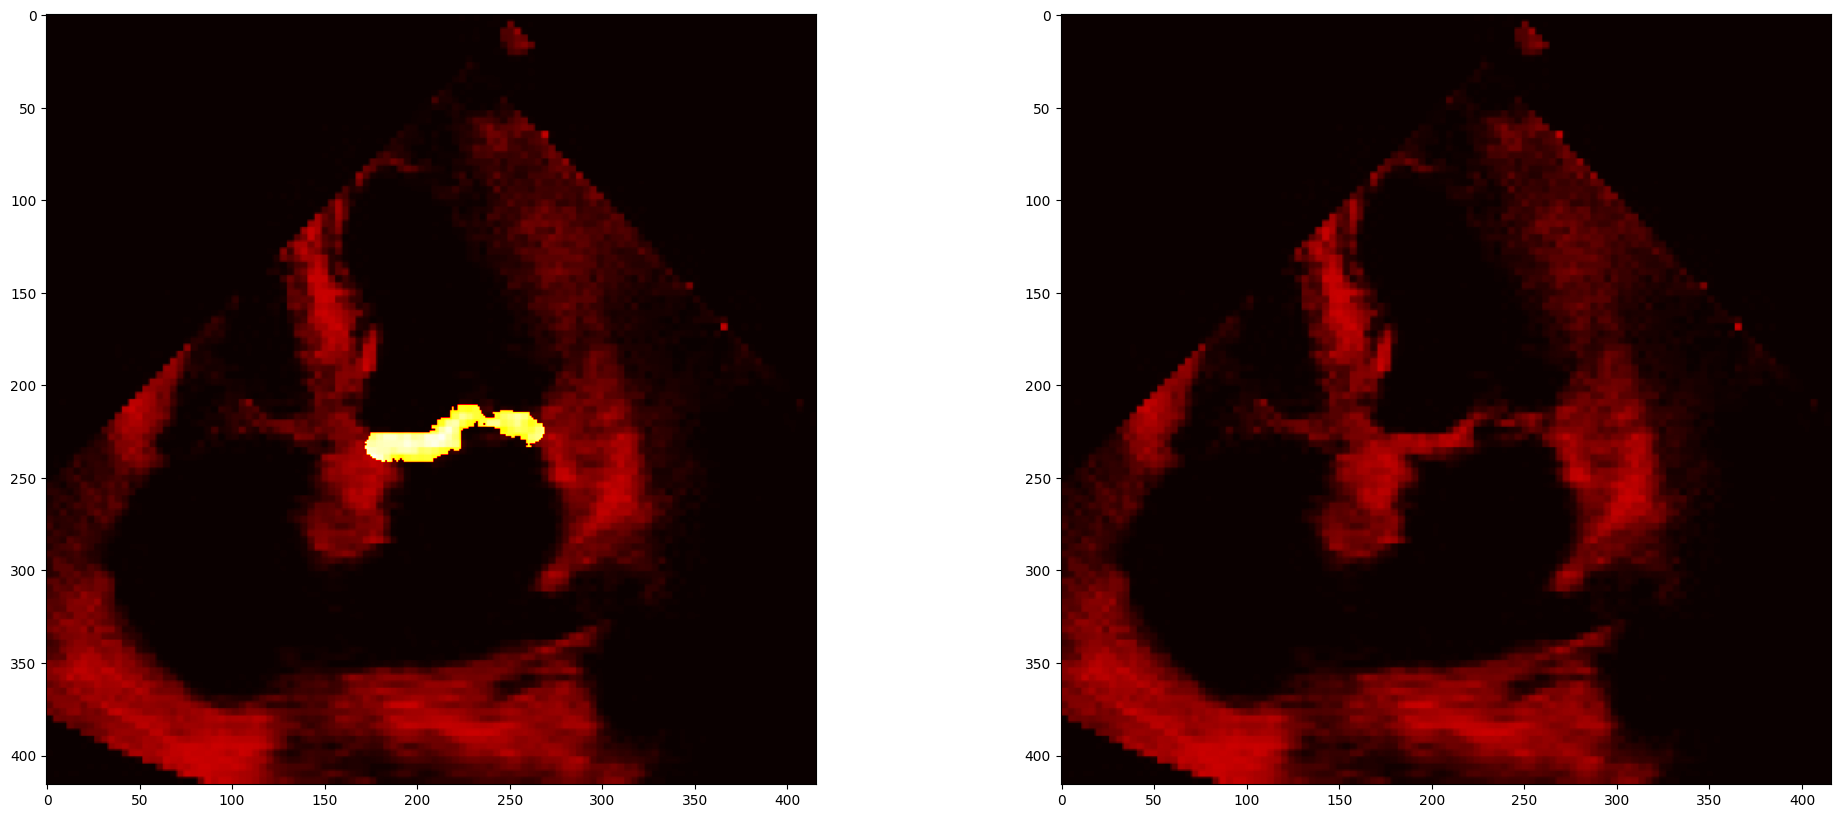

In [ ]:
a = next(test_generator)
b = np.where(unet_model.predict(a)>0.5, 1, 0)

for i in range(batch_size):
    plt.figure(figsize=(24, 10))
    plt.subplot(1, 2, 1)
    plt.imshow(a[i] + 5*b[i], cmap='hot', vmin=-1, vmax=6)
    plt.subplot(1, 2, 2)
    plt.imshow(a[i], cmap='hot', vmin=-1, vmax=6)
    plt.show()
    clear_output(wait=True)
    time.sleep(.5)

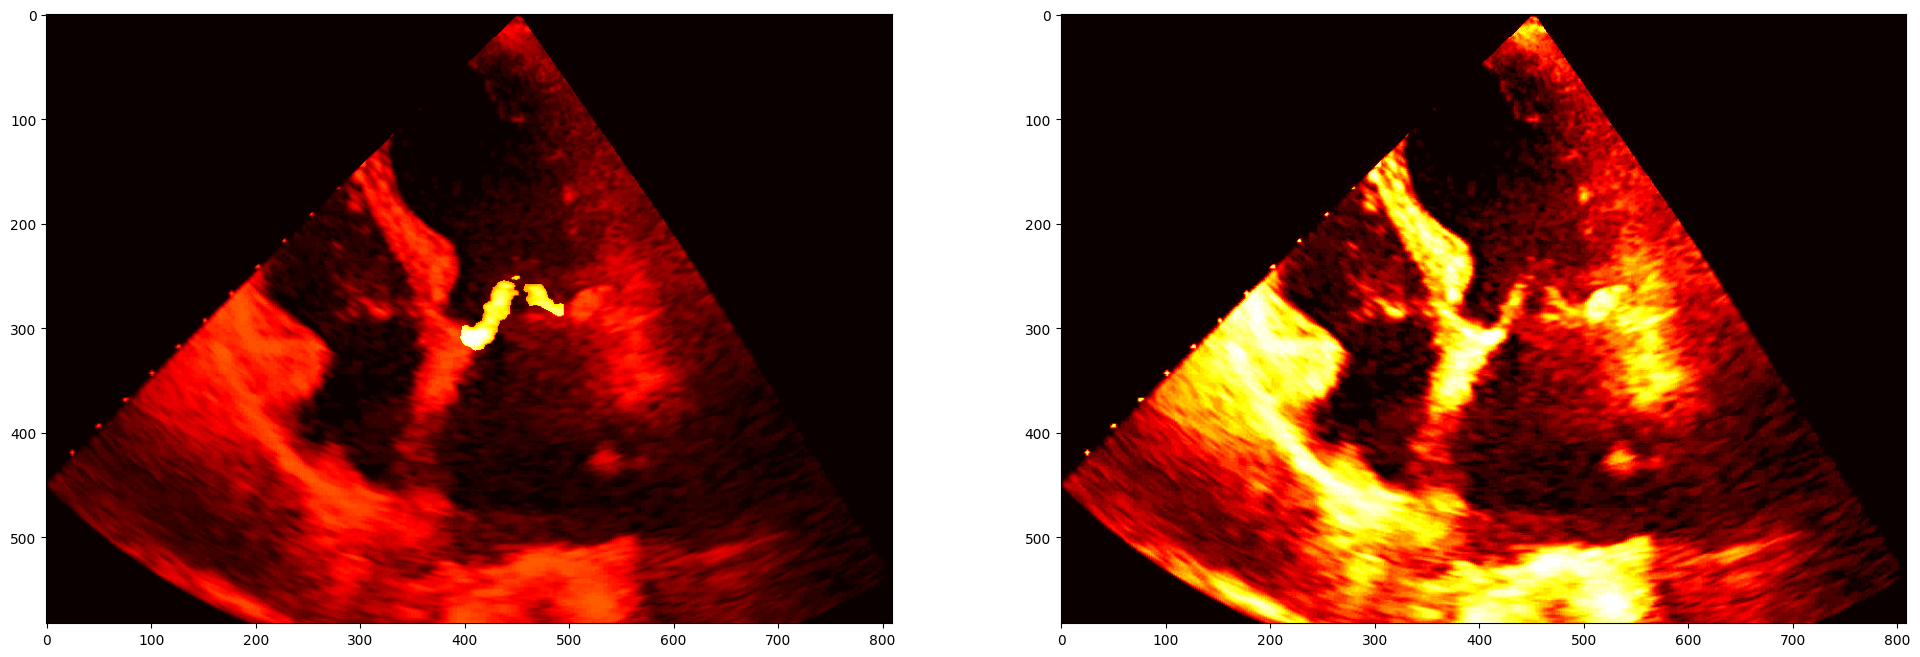

In [27]:
ind = 5

video = test_data[ind]['video']

video_gray = cv2.resize(video, IMG_SIZE, interpolation = cv2.INTER_LANCZOS4).astype(np.uint8)
video_gray = preprocessing_function(video_gray).transpose(2,0,1)
video_gray = video_gray.reshape(*video_gray.shape, 1)

predictions = unet_model.predict(video_gray, verbose=False).transpose(1,2,0,3)[:,:,:,0]
predictions = cv2.resize(predictions, (video.shape[1], video.shape[0]), interpolation = cv2.INTER_LANCZOS4)
predictions = np.where(predictions>.5, True, False)

for i in range(predictions.shape[2]):
    plt.figure(figsize=(24, 10))
    plt.subplot(1, 2, 1)
    plt.imshow(video[:,:,i]/255 + predictions[:,:,i].astype(bool), cmap='hot', vmin=0, vmax=2)
    plt.subplot(1, 2, 2)
    plt.imshow(video[:,:,i]/255, cmap='hot', vmin=0, vmax=1)
    plt.show()
    clear_output(wait=True)
    # time.sleep(.01)

In [24]:
predictions_list = []

for d in test_data:

    video = d['video']

    video_gray = cv2.resize(video, IMG_SIZE, interpolation = cv2.INTER_LANCZOS4).astype(np.uint8)
    video_gray = preprocessing_function(video_gray).transpose(2,0,1)
    video_gray = video_gray.reshape(*video_gray.shape, 1)

    predictions = unet_model.predict(video_gray, verbose=False).transpose(1,2,0,3)[:,:,:,0]
    predictions = cv2.resize(predictions, (video.shape[1], video.shape[0]), interpolation = cv2.INTER_LANCZOS4)
    predictions = np.where(predictions>.5, True, False)

    predictions_list.append({
        'name': d['name'],
        'prediction': predictions
        }
    )

In [25]:
save_zipped_pickle(predictions_list, 'my_predictions2.pkl')